The output is a batch of feature vectors. For each input image, the feature vector has size num_features = 2048. The feature vectors can then be used further, e.g., for classification as above.

The input images are expected to have color values in the range [0,1], following the common image input conventions. The expected size of the input images is height x width = 299 x 299 pixels by default, but other input sizes are possible (within limits).



In [106]:
%reset -f

In [1]:
dataset_path = "C:/Users/vaibhav.jadhav/Downloads/seed_5_dataset"

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [4]:
# !pip install MNE

     |████████████████████████████████| 7.7 MB 7.8 MB/s 
  Created wheel for MNE: filename=mne-1.0.1-py3-none-any.whl size=7542700 sha256=85f45bf42a7c4918ab8a6bcae252fc1eeddd71b8ebaa145c230406cd55306b86
  Stored in directory: /root/.cache/pip/wheels/b1/16/e2/46ea7fb2215890e506fa85526ccbc2145663ad12c356d04c35
Successfully built MNE


In [2]:
import numpy as np
import mne

print(np.__version__)
print(mne.__version__)

1.20.3
1.0.2


In [4]:
# use mne to load the file "6_3_20180802.cnt"
# eeg_raw = mne.io.read_raw_cnt(f'{dataset_path}/eeg_raw_data/1_1_20180804.cnt')
# print(type(eeg_raw))
# print(eeg_raw)
# print('\n')
# print(eeg_raw.info)

<class 'mne.io.cnt.cnt.RawCNT'>
<RawCNT | 1_1_20180804.cnt, 66 x 3378360 (3378.4 s), ~68 kB, data not loaded>


<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-04-08 06:05:05 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


In [5]:
# check channel names
# ch_names = eeg_raw.ch_names
# print(ch_names)
# print(len(ch_names))
# print('\n')

# # drop non-used channels
# useless_ch = ['M1', 'M2', 'VEO', 'HEO']
# eeg_raw.drop_channels(useless_ch)
# new_ch = eeg_raw.ch_names
# print(new_ch)
# print(len(new_ch))
# print('\n')

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'HEO']
66


['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
62




Using matplotlib as 2D backend.
Opening raw-browser...


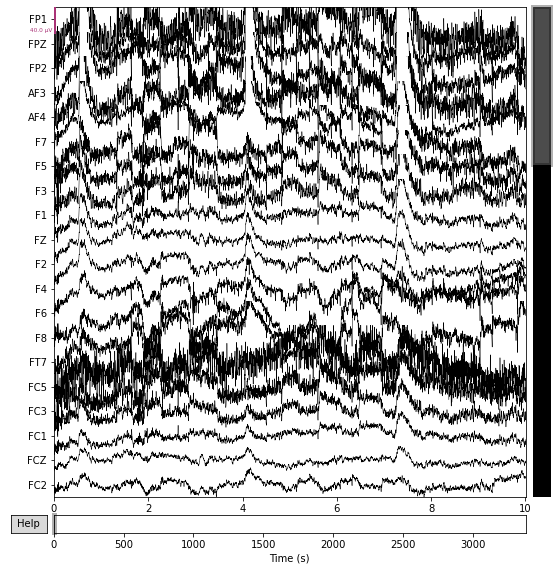

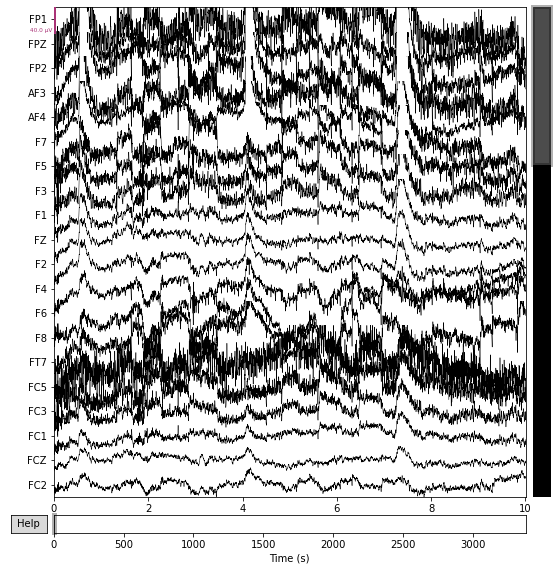

In [6]:
# see raw data wave
# eeg_raw.plot()

In [12]:
# type(eeg_raw)

mne.io.cnt.cnt.RawCNT

In [6]:
# get the data matrix
# data_matrix = eeg_raw.get_data()
# print(data_matrix.shape)

(62, 3378360)


In [11]:
# type(data_matrix)

numpy.ndarray

In [7]:
# raw_downsampled =  eeg_raw.copy().resample(sfreq=200)

In [8]:
# type(raw_downsampled)

mne.io.cnt.cnt.RawCNT

In [9]:
# downsampled_data_matrix = raw_downsampled.get_data()
# print(downsampled_data_matrix.shape)

(62, 675672)


In [10]:
# # with file "trial_start_end_timestamp.txt", you can split the data into different trials
# start_second = [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
# end_second = [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]

# ###########################################################
# ### Notice: we did not filt the orignal signal here #######
# ### you may need to filt the data before other process ####
# ### To filt the signal, please refer to MNE documents #####
# ###########################################################
# start_second = [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
# end_second = [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]
# fs = 1000

# data_trial_1 = data_matrix[:, start_second[0]*fs : end_second[0]*fs]
# data_trial_5 = data_matrix[:, start_second[4]*fs : end_second[4]*fs]
# data_trial_15 = data_matrix[:, start_second[14]*fs : end_second[14]*fs]

# print(data_trial_1.shape)
# print(data_trial_5.shape)
# print(data_trial_15.shape)

(62, 291000)
(62, 52000)
(62, 178000)


In [16]:
# data_trial_1_raw = mne.io.RawArray(data_trial_1, eeg_raw.info)
# data_trial_1_raw.resample(sfreq=200)

Creating RawArray with float64 data, n_channels=62, n_times=291000
    Range : 0 ... 290999 =      0.000 ...   290.999 secs
Ready.


<RawArray | 62 x 58200 (291.0 s), ~27.6 MB, data loaded>

In [17]:
# data_trial_1_downsampled = data_trial_1_raw.get_data()

In [18]:
# data_trial_1_downsampled.shape

(62, 58200)

In [19]:
# data_trial_1 = data_trial_1_downsampled

In [3]:
# Session 1:
# start_second: [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
# end_second: [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]

# Session 2:
# start_second: [30, 299, 548, 646, 836, 1000, 1091, 1392, 1657, 1809, 1966, 2186, 2333, 2490, 2741]
# end_second: [267, 488, 614, 773, 967, 1059, 1331, 1622, 1777, 1908, 2153, 2302, 2428, 2709, 2817]

# Session 3:
# start_second: [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
# end_second: [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]



all_start_end = {}

for exp in range(1,4):
    all_start_end[exp] = {}
  
all_start_end[1]["start"] =[30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
all_start_end[1]["end"] =[102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
all_start_end[2]["start"] =[30, 299, 548, 646, 836, 1000, 1091, 1392, 1657, 1809, 1966, 2186, 2333, 2490, 2741]
all_start_end[2]["end"] =[267, 488, 614, 773, 967, 1059, 1331, 1622, 1777, 1908, 2153, 2302, 2428, 2709, 2817]
all_start_end[3]["start"] =[30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
all_start_end[3]["end"] =[321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]

     
all_start_end


{1: {'start': [30,
   132,
   287,
   555,
   773,
   982,
   1271,
   1628,
   1730,
   2025,
   2227,
   2435,
   2667,
   2932,
   3204],
  'end': [102,
   228,
   524,
   742,
   920,
   1240,
   1568,
   1697,
   1994,
   2166,
   2401,
   2607,
   2901,
   3172,
   3359]},
 2: {'start': [30,
   299,
   548,
   646,
   836,
   1000,
   1091,
   1392,
   1657,
   1809,
   1966,
   2186,
   2333,
   2490,
   2741],
  'end': [267,
   488,
   614,
   773,
   967,
   1059,
   1331,
   1622,
   1777,
   1908,
   2153,
   2302,
   2428,
   2709,
   2817]},
 3: {'start': [30,
   353,
   478,
   674,
   825,
   908,
   1200,
   1346,
   1451,
   1711,
   2055,
   2307,
   2457,
   2726,
   2888],
  'end': [321,
   418,
   643,
   764,
   877,
   1147,
   1284,
   1418,
   1679,
   1996,
   2275,
   2425,
   2664,
   2857,
   3066]}}

In [14]:
# # Session 1:
# start_second: [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
# end_second: [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]

In [22]:
# data_dict = dict.fromkeys(range(1,16),0) 

In [11]:
# for i in range(1,16):
#   data_dict[i] = data_matrix[:, start_second[i-1]*1000 : end_second[i-1]*1000]


In [12]:
# data_dict[1].shape

(62, 291000)

In [23]:
# data_dict[1] = data_trial_1_downsampled

In [24]:
# data_dict[1].shape

(62, 58200)

In [4]:
spectrogram_height = 229
spectrogram_width = 229
hop_size = 3

frame_size = ((spectrogram_height-1) * 2)
sample_size = ((spectrogram_width-1) * hop_size)

In [5]:
fs = 200

In [6]:
import os
import sys
import math
import numpy as np
# import pandas as pd
import scipy.io as sio
from sklearn import preprocessing
from scipy.signal import butter, lfilter
from scipy.io import loadmat

In [7]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import tensorflow_hub as hub

In [9]:
import time

In [10]:
import gc

In [11]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [12]:
def compute_spectrogram(signal, sr=fs,frame_size = frame_size, hop = hop_size):
    stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop)
    log_stft= librosa.power_to_db(np.abs(stft) ** 2)
    return log_stft
#     print(log_stft.shape)
#     plot_spectrogram(log_stft, sr, hop, y_axis="log")

In [13]:
def plot_spectrogram(Y, sr=fs, hop_length=hop_size, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [15]:
# data_dict[1].shape

In [16]:
# data_dict[1][0].shape

In [60]:
# temp_delta = butter_bandpass_filter(data_dict[1][0], 31, 51, 200, order=3)
# temp_delta.shape

(58200,)

In [61]:
# np.min(temp_delta), np.max(temp_delta)

(-5.861899005229364e-05, 6.331452306907969e-05)

In [62]:
# temp_delta = temp_delta+abs(np.min(temp_delta))

In [63]:
# temp_delta = temp_delta/np.max(temp_delta)

In [64]:
# np.min(temp_delta), np.max(temp_delta)

(0.0, 1.0)

In [65]:
# fs,frame_size, hop_size , sample_size

(200, 456, 3, 684)

In [66]:
# temp_delta[:sample_size]

array([0.47674183, 0.47687066, 0.49857217, 0.5020654 , 0.44685414,
       0.42261477, 0.5083427 , 0.57656393, 0.5005146 , 0.39655893,
       0.40426987, 0.48397453, 0.5532227 , 0.55759185, 0.4757165 ,
       0.39746063, 0.43481628, 0.52527429, 0.52271242, 0.4597378 ,
       0.46001753, 0.49793227, 0.49603675, 0.46655079, 0.45633627,
       0.48416742, 0.50986847, 0.49358757, 0.46625932, 0.46317785,
       0.47657915, 0.48439708, 0.47881128, 0.48337083, 0.51376741,
       0.51428359, 0.42511128, 0.37093847, 0.51623142, 0.66854176,
       0.5299887 , 0.2726166 , 0.29827018, 0.58764069, 0.73714549,
       0.55892342, 0.31436075, 0.2980958 , 0.46372214, 0.59177519,
       0.58785941, 0.5143033 , 0.45241165, 0.40469118, 0.38081257,
       0.44949616, 0.58556604, 0.63488905, 0.51527423, 0.34678691,
       0.3239844 , 0.47307614, 0.61194414, 0.58796324, 0.46117217,
       0.3961546 , 0.44229134, 0.50166844, 0.50075764, 0.47447186,
       0.46786869, 0.48730302, 0.52722089, 0.52779929, 0.43431

In [67]:
# temp_specgram_delta = compute_spectrogram(temp_delta[:sample_size])
# print(temp_specgram_delta.shape)
# print(temp_specgram_delta)

(229, 229)
[[ 34.81441727  35.03901572  35.25773751 ...  35.18379514  34.96308503
   34.73645377]
 [ 32.96971509  33.13948615  33.30238476 ...  33.24761229  33.08238036
   32.91024116]
 [ 27.33222137  27.32479873  27.30623724 ...  27.31389746  27.32865801
   27.33228335]
 ...
 [-12.38144573 -12.38640994 -12.39883136 ... -13.81421404 -13.80448334
  -13.80212432]
 [-12.3821185  -12.38705018 -12.39937536 ... -13.8145186  -13.80474689
  -13.80245099]
 [-12.38226383 -12.38722756 -12.39964977 ... -13.81475531 -13.80502464
  -13.80266526]]


In [68]:
# np.min(temp_specgram_delta),np.max(temp_specgram_delta)

(-39.202995490540815, 40.797004509459185)

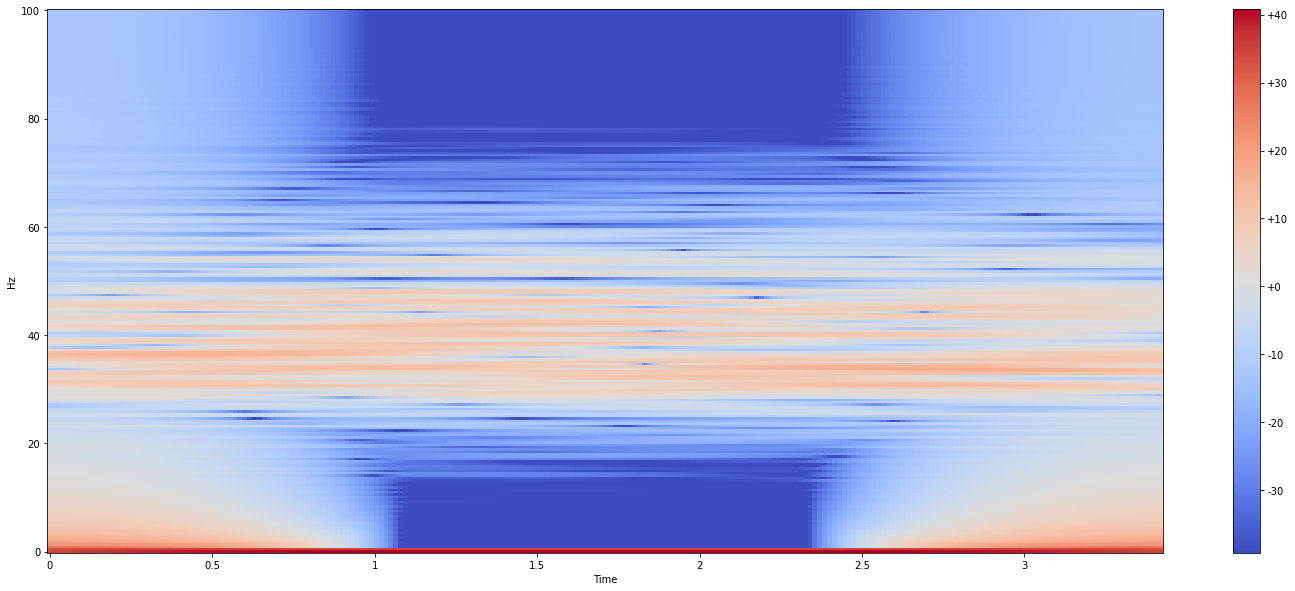

In [69]:
# plot_spectrogram(temp_specgram_delta)

In [70]:
# temp_specgram_delta = temp_specgram_delta+abs(np.min(temp_specgram_delta))

In [71]:
# temp_specgram_delta = temp_specgram_delta/np.max(temp_specgram_delta)

In [72]:
# np.min(temp_specgram_delta),np.max(temp_specgram_delta)

(0.0, 1.0)

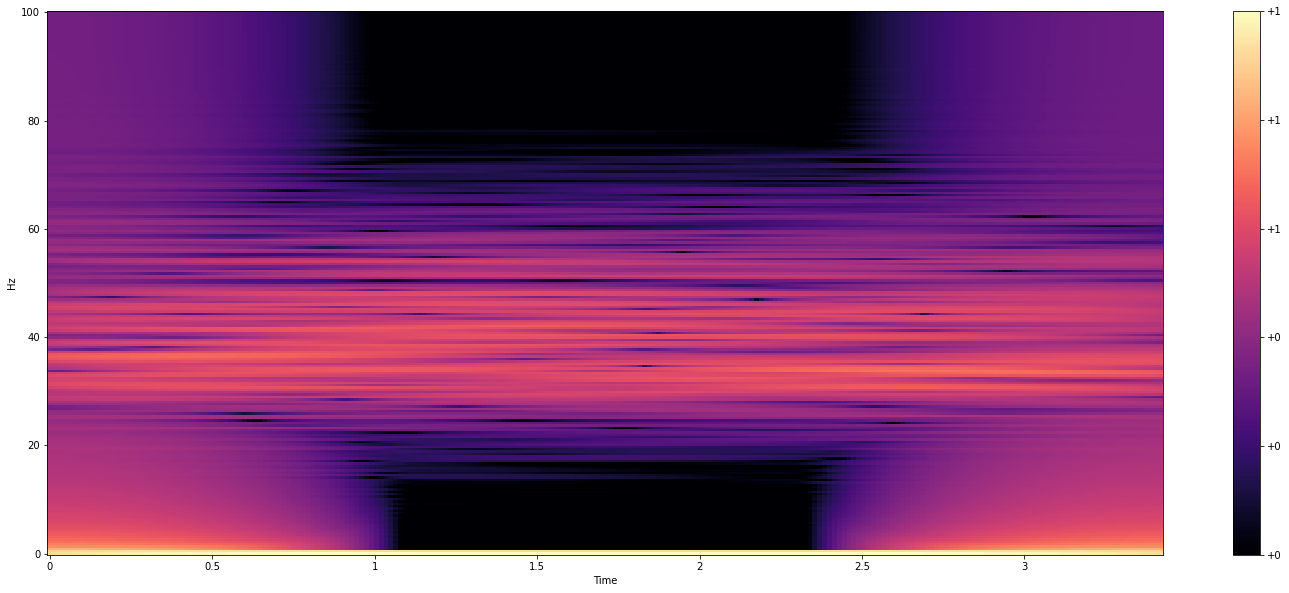

In [73]:
# plot_spectrogram(temp_specgram_delta)

# extract features

In [14]:
session1_label = [4,1,3,2,0,4,1,3,2,0,4,1,3,2,0]
session2_label = [2,1,3,0,4,4,0,3,2,1,3,4,1,2,0]
session3_label = [2,1,3,0,4,4,0,3,2,1,3,4,1,2,0]

In [15]:
session_label_dict = {}
session_label_dict[1] = session1_label
session_label_dict[2] = session2_label
session_label_dict[3] = session3_label
session_label_dict

{1: [4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0],
 2: [2, 1, 3, 0, 4, 4, 0, 3, 2, 1, 3, 4, 1, 2, 0],
 3: [2, 1, 3, 0, 4, 4, 0, 3, 2, 1, 3, 4, 1, 2, 0]}

In [16]:
all_trial_sizes = {}
for exp in range(1,4):
    all_trial_sizes[exp] = []

In [20]:
# feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"


# pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(229, 229, 3), trainable=False)


# model = tf.keras.Sequential([
#   pretrained_model_without_top_layer
# ])

# model.summary()

In [17]:
fs = 200

def decompose_ram_efficient(file, file_mat, exp_id):
    t_start = time.time()
    # trial*channel*sample
    feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"
    out_dim_of_TL_model = 2048
    data_raw = mne.io.read_raw_cnt(file)#loadmat(file)
    useless_ch = ['M1', 'M2', 'VEO', 'HEO']
    data_raw.drop_channels(useless_ch)
    data = data_raw.get_data()
    gc.collect()
    data_dict = dict.fromkeys(range(1,16),0) 
    for g in range(1,16):
#         print(f"start:{data_raw[:, all_start_end[exp_id]["start"][g-1]}")
#         print(f"end:{data_raw[:, all_start_end[exp_id]["end"][g-1]}")
        data_dict[g] = data[:, all_start_end[exp_id]["start"][g-1]*1000 : all_start_end[exp_id]["end"][g-1]*1000]
        

    frequency = fs
#     time_window = 0.5
#     data_points_per_sample = frequency * time_window  #fz = 200per sec -> 100 data_points per 0.5sec window
    data_points_per_sample = sample_size
    # name = ""
    # for char in list(data.keys())[7]: #instead of 7, u can pass any no. between 3 and 15
    #   if char == "_":
    #     break
    #   name = name+char

#     fft_crop_length = 21 

    decomposed_specgram = np.empty([0, 62, 229, 229, 3])
    label = np.array([])


    x_TL_features = np.empty([0, 62, out_dim_of_TL_model])
    
    
    for trial in range(15):
        tmp_trial_signal_raw = data_dict[trial + 1]
        t1_resample = time.time()
#         print(tmp_trial_signal_raw.shape)
        tmp_trial_signal_downsampled = mne.io.RawArray(tmp_trial_signal_raw, data_raw.info)
        tmp_trial_signal_downsampled.resample(sfreq=200)
        tmp_trial_signal = tmp_trial_signal_downsampled.get_data()
        t2_resample = time.time()
        subject_id = ""
        for i in file_mat:
            if i == "_":
                break
            subject_id += i
        print(f"time for subject:{subject_id}, exp:{exp_id} and trial:{trial+1} for downsampling is: {t2_resample - t1_resample}")
        
        num_sample = int(len(tmp_trial_signal[0]) / data_points_per_sample) 
        print('{}-{}'.format(trial + 1, num_sample))
        all_trial_sizes[exp_id].append(num_sample)

        # temp_fft = np.empty([0, num_sample, 21])
        temp_specgram = np.empty([0, 229, 229])
        label = np.append(label, [session_label_dict[exp_id][trial]] * num_sample)

        t1_spec  =time.time()
        for channel in range(62):
            trial_signal = tmp_trial_signal[channel]

            delta_theta_alpha = butter_bandpass_filter(trial_signal, 1, 14, frequency, order=3)
            delta_theta_alpha = delta_theta_alpha+abs(np.min(delta_theta_alpha))
            delta_theta_alpha = delta_theta_alpha/np.max(delta_theta_alpha)
            
            beta = butter_bandpass_filter(trial_signal, 14, 31, frequency, order=3)
            beta = beta+abs(np.min(beta))
            beta = beta/np.max(beta)
            
            gamma = butter_bandpass_filter(trial_signal, 31, 51, frequency, order=3)
            gamma = gamma+abs(np.min(gamma))
            gamma = gamma/np.max(gamma)

            specgram_delta_theta_alpha = np.zeros(shape=[0, 229, 229], dtype=float)
            specgram_beta = np.zeros(shape=[0, 229, 229], dtype=float)
            specgram_gamma = np.zeros(shape=[0, 229, 229], dtype=float)

            for index in range(num_sample):
                specgram_delta_theta_alpha = np.vstack([specgram_delta_theta_alpha, compute_spectrogram(delta_theta_alpha[index * sample_size:(index + 1) * sample_size]).reshape(1,229,229)])
                specgram_beta = np.vstack([specgram_beta, compute_spectrogram(beta[index * sample_size:(index + 1) * sample_size]).reshape(1,229,229)])
                specgram_gamma = np.vstack([specgram_gamma, compute_spectrogram(gamma[index * sample_size:(index + 1) * sample_size]).reshape(1,229,229)])
                # print(fft_delta.shape, fft_theta.shape, fft_alpha.shape, fft_beta.shape, fft_gamma.shape)

            temp_specgram = np.vstack([temp_specgram, specgram_delta_theta_alpha])
            temp_specgram = np.vstack([temp_specgram, specgram_beta])
            temp_specgram = np.vstack([temp_specgram, specgram_gamma])

        t2_spec = time.time()
        temp_specgram = temp_specgram.reshape(-1, 3, num_sample, 229, 229)
        temp_specgram = temp_specgram.transpose([2, 0, 3, 4, 1])
        subject_id = ""
        for i in file_mat:
            if i == "_":
                break
            subject_id += i
#         np.save(f"{dataset_path}/my_extracted_features/spectrogram(229_229_3)/{subject_id}_{trial+1}_X_1D.npy",temp_trial_specgram)
#         decomposed_specgram = np.vstack([decomposed_specgram, temp_trial_specgram])
#         

        subject = subject_id
#         trial_group = en+1


        temp_x = temp_specgram #(#,62,229,229,3)
        print(f"time for subject:{subject}, exp:{exp_id} and trial:{trial+1} for specgrams is: {t2_spec - t1_spec}")
        print(f"subject:{subject}, exp:{exp_id} and trial:{trial+1} has specgrams as: {temp_x.shape}")
        
        # spectrogram creation complete
        
############################# TL start ##################################    
        # starting Transefer learning, forward pass in inception v3 with top layer removed

        t1_TL = time.time()
        pretrained_model_without_top_layer = hub.KerasLayer(
            feature_extractor_model, input_shape=(229, 229, 3), trainable=False)

        
        for sample in range(temp_x.shape[0]):
            temp_x_TL_features = np.empty([0, out_dim_of_TL_model])
            for channel in range(temp_x.shape[1]):
                results = ((np.array(pretrained_model_without_top_layer(temp_x[sample,channel].reshape((1,229,229,3))))))
                temp_x_TL_features = np.vstack([temp_x_TL_features, results])
            temp_x_TL_features = temp_x_TL_features.reshape((1,temp_x_TL_features.shape[0],out_dim_of_TL_model))
            x_TL_features = np.vstack([x_TL_features, temp_x_TL_features])
        
        t2_TL = time.time()
        print(f"time for subject:{subject}, exp:{exp_id} and trial:{trial+1} for TL is: {t2_TL - t1_TL}")
        temp_x = None 
        temp_specgram = None
        gc.collect()
############################# TL done ##################################        
    
####converting EEG signals to 8x9 feature map, to capture their spatial information and pass to CNN model later ####
####for more information about 8x9 map, refer to paper with following link or DOI ####
# link: https://www.itm-conferences.org/articles/itmconf/abs/2023/03/itmconf_icdsia2023_02011/itmconf_icdsia2023_02011.html
# DOI: https://doi.org/10.1051/itmconf/20235302011        
    
#     x_TL_features = np.empty([0, 62, 1280])
    print(f"TL_features_for subject:{subject} and exp:{exp_id} -> {x_TL_features.shape}")

    t1_x89 = time.time()
    X89 = np.zeros((x_TL_features.shape[0], 8, 9, out_dim_of_TL_model))
    
    X89[:, 0, 2, :] = x_TL_features[:, 3, :]
    X89[:, 0, 3:6, :] = x_TL_features[:, 0:3, :]
    X89[:, 0, 6, :] = x_TL_features[:, 4, :]

    for i in range(5):
      X89[:, i + 1, :, :] = x_TL_features[:, 5 + i * 9:5 + (i + 1) * 9, :]

    X89[:, 6, 1:8, :] = x_TL_features[:, 50:57, :]
    X89[:, 7, 2:7, :] = x_TL_features[:, 57:62, :]
    
    t2_x89 = time.time()
    print(f"time for 8x9 map for subject:{subject} and exp:{exp_id} is -> {t2_x89 - t1_x89}")
    print(f"8x9 map dim for subject:{subject} and exp:{exp_id} is -> {X89.shape}")


    np.save(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/{subject}_{exp_id}_X89.npy",X89)
    np.save(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/{subject}_{exp_id}_y.npy",label)

    t_end = time.time()
    print(f"time for subject:{subject} and exp:{exp_id} is -> {t_end - t_start} sec.")
#     x89 = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/TL_mobilenet_v2/{subject}_{trial_group}_X89.npy")
#     print(x89.shape)
    print("######################################################")


#         %reset -f
    

In [18]:
file_path = f"{dataset_path}/eeg_raw_data/"


In [19]:

files = os.listdir(file_path)
files.remove('Load_cnt_file_with_mne.ipynb')
files.sort(key= (lambda i : '0'+i[0]+i[2] if i[2]!="_" else i[0]+i[1]+i[3]))#i[:2] if i[1]!="_" else "0"+i[0]) )
print(files)

['1_1_20180804.cnt', '1_2_20180810.cnt', '1_3_20180808.cnt', '2_1_20180416.cnt', '2_2_20180419.cnt', '2_3_20180425.cnt', '3_1_20180414.cnt', '3_2_20180419.cnt', '3_3_20180424.cnt', '4_1_20180414.cnt', '4_2_20180417.cnt', '4_3_20180501.cnt', '5_1_20180719.cnt', '5_2_20180728.cnt', '5_3_20180723.cnt', '6_1_20180713.cnt', '6_2_20180731.cnt', '6_3_20180802.cnt', '7_1_20180411.cnt', '7_2_20180418.cnt', '7_3_20180422.cnt', '8_1_20180717.cnt', '8_2_20180802.cnt', '8_3_20180726.cnt', '9_1_20180724.cnt', '9_2_20180804.cnt', '9_3_20180728.cnt', '10_1_20180507.cnt', '10_2_20180524.cnt', '10_3_20180626.cnt', '11_1_20180510.cnt', '11_2_20180508.cnt', '11_3_20180522.cnt', '12_1_20180515.cnt', '12_2_20180508.cnt', '12_3_20180517.cnt', '13_1_20180720.cnt', '13_2_20180806.cnt', '13_3_20180725.cnt', '14_1_20180420.cnt', '14_2_20180423.cnt', '14_3_20180427.cnt', '15_1_20180724.cnt', '15_2_20180807.cnt', '15_3_20180730.cnt', '16_1_20180805.cnt', '16_2_20180815.cnt', '16_3_20180813.cnt']


In [20]:
# print(files.pop())
# print(files.pop())
len(files)

48

In [21]:
files[23],files[24],files[29],files[30],files[45],files[46]

('8_3_20180726.cnt',
 '9_1_20180724.cnt',
 '10_3_20180626.cnt',
 '11_1_20180510.cnt',
 '16_1_20180805.cnt',
 '16_2_20180815.cnt')

In [22]:
# X = np.empty([0, 62, 224, 224, 3])
# y = np.empty([0, 1])

exp_id = 0
for i in files[:]:
    exp_id+=1
    file_name = file_path + i
    print(f'processing {i}')
    decompose_ram_efficient(file_name, i, exp_id)
    if exp_id == 3:
        exp_id = 0
        print(all_trial_sizes)
        for exp in range(1,4):
            all_trial_sizes[exp] = []
        print("###########################################################")

processing 16_2_20180815.cnt


C:\Users\VAIBHA~1.IMA\AppData\Local\Temp/ipykernel_23040/2670932607.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data_raw = mne.io.read_raw_cnt(file)#loadmat(file)


Creating RawArray with float64 data, n_channels=62, n_times=237000
    Range : 0 ... 236999 =      0.000 ...   236.999 secs
Ready.
time for subject:16, exp:2 and trial:1 for downsampling is: 0.7634632587432861
1-69
time for subject:16, exp:2 and trial:1 for specgrams is: 307.68533158302307
subject:16, exp:2 and trial:1 has specgrams as: (69, 62, 229, 229, 3)
time for subject:16, exp:2 and trial:1 for TL is: 257.37064242362976
Creating RawArray with float64 data, n_channels=62, n_times=189000
    Range : 0 ... 188999 =      0.000 ...   188.999 secs
Ready.
time for subject:16, exp:2 and trial:2 for downsampling is: 1.6342577934265137
2-55
time for subject:16, exp:2 and trial:2 for specgrams is: 298.9542701244354
subject:16, exp:2 and trial:2 has specgrams as: (55, 62, 229, 229, 3)
time for subject:16, exp:2 and trial:2 for TL is: 119.36645698547363
Creating RawArray with float64 data, n_channels=62, n_times=66000
    Range : 0 ... 65999 =      0.000 ...    65.999 secs
Ready.
time for sub

C:\Users\VAIBHA~1.IMA\AppData\Local\Temp/ipykernel_23040/2670932607.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data_raw = mne.io.read_raw_cnt(file)#loadmat(file)


Creating RawArray with float64 data, n_channels=62, n_times=291000
    Range : 0 ... 290999 =      0.000 ...   290.999 secs
Ready.
time for subject:16, exp:3 and trial:1 for downsampling is: 1.7889862060546875
1-85
time for subject:16, exp:3 and trial:1 for specgrams is: 485.4524042606354
subject:16, exp:3 and trial:1 has specgrams as: (85, 62, 229, 229, 3)
time for subject:16, exp:3 and trial:1 for TL is: 206.3875105381012
Creating RawArray with float64 data, n_channels=62, n_times=65000
    Range : 0 ... 64999 =      0.000 ...    64.999 secs
Ready.
time for subject:16, exp:3 and trial:2 for downsampling is: 0.20510506629943848
2-19
time for subject:16, exp:3 and trial:2 for specgrams is: 74.6596999168396
subject:16, exp:3 and trial:2 has specgrams as: (19, 62, 229, 229, 3)
time for subject:16, exp:3 and trial:2 for TL is: 149.90621209144592
Creating RawArray with float64 data, n_channels=62, n_times=165000
    Range : 0 ... 164999 =      0.000 ...   164.999 secs
Ready.
time for subje

In [28]:
exp_id = 0
for i in files[45:]:
    exp_id+=1
    file_name = file_path + i
    print(f'processing {i}')
    decompose_ram_efficient(file_name, i, exp_id)
    if exp_id == 3:
        exp_id = 0
        print(all_trial_sizes)
        for exp in range(1,4):
            all_trial_sizes[exp] = []
        print("###########################################################")

processing 16_1_20180805.cnt
Creating RawArray with float64 data, n_channels=62, n_times=72000
    Range : 0 ... 71999 =      0.000 ...    71.999 secs
Ready.
time for subject:16, exp:1 and trial:1 for downsampling is: 0.6876018047332764
1-21
time for subject:16, exp:1 and trial:1 for specgrams is: 83.40913820266724
subject:16, exp:1 and trial:1 has specgrams as: (21, 62, 229, 229, 3)
time for subject:16, exp:1 and trial:1 for TL is: 206.7078721523285
Creating RawArray with float64 data, n_channels=62, n_times=96000
    Range : 0 ... 95999 =      0.000 ...    95.999 secs
Ready.
time for subject:16, exp:1 and trial:2 for downsampling is: 0.8281855583190918
2-28
time for subject:16, exp:1 and trial:2 for specgrams is: 145.0727732181549
subject:16, exp:1 and trial:2 has specgrams as: (28, 62, 229, 229, 3)
time for subject:16, exp:1 and trial:2 for TL is: 55.015037298202515
Creating RawArray with float64 data, n_channels=62, n_times=237000
    Range : 0 ... 236999 =      0.000 ...   236.999

C:\Users\VAIBHA~1.IMA\AppData\Local\Temp/ipykernel_22104/2670932607.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data_raw = mne.io.read_raw_cnt(file)#loadmat(file)


Creating RawArray with float64 data, n_channels=62, n_times=237000
    Range : 0 ... 236999 =      0.000 ...   236.999 secs
Ready.
time for subject:16, exp:2 and trial:1 for downsampling is: 1.121751070022583
1-69
time for subject:16, exp:2 and trial:1 for specgrams is: 275.75992345809937
subject:16, exp:2 and trial:1 has specgrams as: (69, 62, 229, 229, 3)


KeyboardInterrupt: 

In [ ]:
trail_samples = {1:68,2:68,3:60,4:69,5:54,6:57,7:69,8:63,9:77,10:69,11:68,12:68,13:68,14:69,15:60}

In [ ]:
all_trial_sizes = {1: [21, 28, 69, 54, 42, 75, 86, 20, 77, 41, 50, 50, 68, 70, 45], 
                   2: [69, 55, 19, 37, 38, 17, 70, 67, 35, 28, 54, 33, 27, 64, 22], 
                   3: [85, 19, 48, 26, 15, 69, 24, 21, 66, 83, 64, 34, 60, 38, 52]}

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
